<a href="https://colab.research.google.com/github/Alice1304/Section2_project/blob/main/0726_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

유권자의 개별특성을 바탕으로 국가 선거 투표/미투표 여부 예측 

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/Alice1304/Section2_project/main/train.csv')

In [ ]:
df.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


In [ ]:
#결측치 확인 
df.isnull().sum()
#결측치 없음 

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 78, dtype: int64

In [ ]:
#중복데이터 확인
df.duplicated().sum()
#중복데이터 없음

0

In [ ]:
#필요한 컬럼들만 사용하여 학습을 진행합니다

In [ ]:
df = df[['age_group','education','engnat','familysize','gender','married','race','religion','urban','voted']] 
df

,age_group,education,engnat,familysize,gender,married,race,religion,urban,voted
0,30s,2,1,4,Female,3,White,Other,1,2
1,20s,4,2,3,Female,1,Asian,Hindu,3,2
2,30s,3,1,3,Male,2,White,Other,2,1
3,20s,4,2,0,Female,1,Asian,Hindu,3,1
4,20s,3,1,2,Male,2,White,Agnostic,1,1
...,...,...,...,...,...,...,...,...,...,...
45527,10s,2,1,1,Female,1,White,Jewish,3,2
45528,30s,2,1,2,Male,1,White,Atheist,1,2
45529,10s,2,1,1,Female,1,White,Christian_Other,2,1
45530,40s,4,1,2,Male,1,White,Atheist,0,1


In [ ]:
df.nunique()
#familysize= 형제자매수, 27개의 고유값들이 있어 분포를 살펴보려 합니다. 

age_group      7
education      5
engnat         3
familysize    27
gender         2
married        4
race           7
religion      12
urban          4
voted          2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


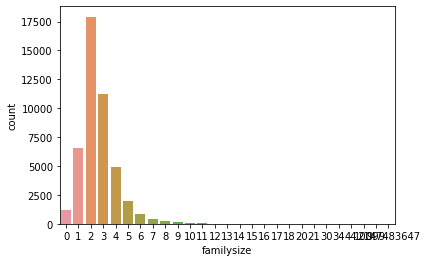

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


x = df['familysize']
x
x.value_counts(normalize=True)
sns.countplot(x);

In [ ]:
#familysize의 값 수정  11명 이상은 모두 11명으로 표기 
df.loc[df['familysize']>=11, 'familysize'] = 11

In [ ]:
df.replace({'age_group' : {'10s' : 1, '20s': 2, '30s':3, '40s' : 4, '50s' : 5, '60s' :6, '+70s' : 7} ,
            'gender' : {'Female' : 1, 'Male' : 2},
            'race' : {'Asian' : 1,'Arab' :2, 'Black' :3, 'Indigenous Australian' : 4, 'Native American' :5, 'White' :6, 'Other' : 7 },
            'religion' : {'Agnostic' : 1, 'Atheist' : 2, 'Buddhist': 3, 'Christian_Catholic' :4, 'Christian_Mormon':5, 'Christian_Protestant':6, 'Christian_Other':7, 'Hindu':8, 'Jewish':9, 'Muslim':10, 'Sikh':11, 'Other':12}}, inplace = True
)
df

,age_group,education,engnat,familysize,gender,married,race,religion,urban,voted
0,3,2,1,4,1,3,6,12,1,2
1,2,4,2,3,1,1,1,8,3,2
2,3,3,1,3,2,2,6,12,2,1
3,2,4,2,0,1,1,1,8,3,1
4,2,3,1,2,2,2,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...
45527,1,2,1,1,1,1,6,9,3,2
45528,3,2,1,2,2,1,6,2,1,2
45529,1,2,1,1,1,1,6,7,2,1
45530,4,4,1,2,2,1,6,2,0,1


In [ ]:
df.nunique()

age_group      7
education      5
engnat         3
familysize    12
gender         2
married        4
race           7
religion      12
urban          4
voted          2
dtype: int64

In [ ]:
#원본데이터에서 선택한 특성들이 얼마나 투표 여부에 영향을 미치는 지 확인하기 위해 시각화 진행 

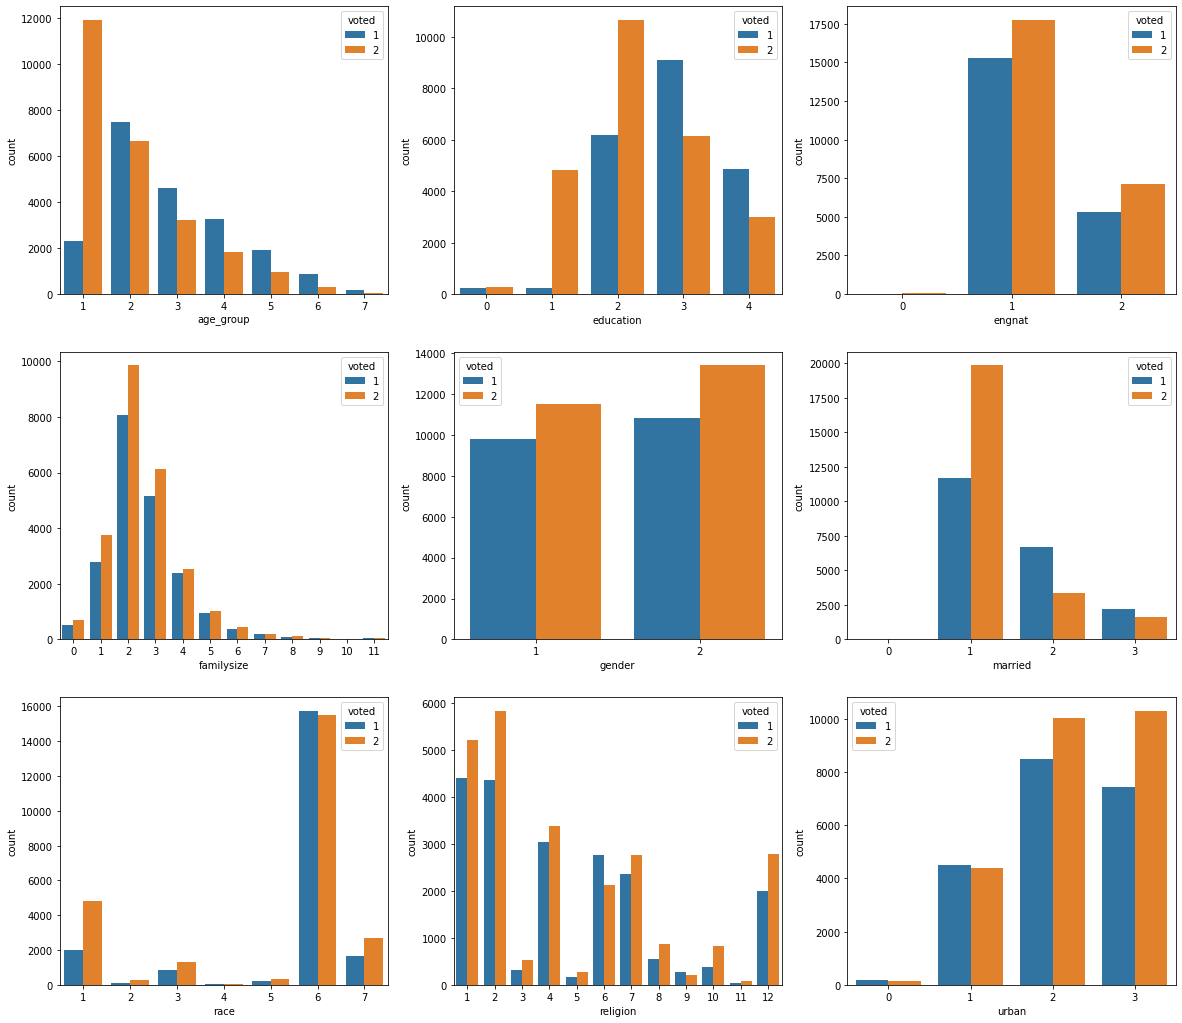

In [ ]:
#연령그룹 
fig,ax = plt.subplots(3,3, figsize=(20,18))


plt.subplot(3,3,1)
sns.countplot(data = df, x = 'age_group', hue = df['voted'])


plt.subplot(3,3,2)
sns.countplot(data = df, x = 'education', hue = df['voted'])

plt.subplot(3,3,3)
sns.countplot(data = df, x = 'engnat', hue = df['voted'])

plt.subplot(3,3,4)
sns.countplot(data = df, x = 'familysize', hue = df['voted'])

plt.subplot(3,3,5)
sns.countplot(data = df, x = 'gender', hue = df['voted'])

plt.subplot(3,3,6)
sns.countplot(data = df, x = 'married', hue = df['voted'])

plt.subplot(3,3,7)
sns.countplot(data = df, x = 'race', hue = df['voted'])

plt.subplot(3,3,8)
sns.countplot(data = df, x = 'religion', hue = df['voted'])

plt.subplot(3,3,9)
sns.countplot(data = df, x = 'urban', hue = df['voted'])

#시각화를 통해 투표여부에 대한 상관관계 확인 

머신러닝을 위한 데이터 정비

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#평가를 위해 트레인 / 테스트 분리
train, test = train_test_split(df, random_state=2)

In [ ]:
train.shape, test.shape 

((34149, 10), (11383, 10))

In [ ]:
#타겟을 기준으로 feature / target data 분리 
target = 'voted'
features = df.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [ ]:
#분류문제에서는 기준모델을 최빈값으로 설정한다
y_train = train[target]
y_train.value_counts(normalize=True)

2    0.546458
1    0.453542
Name: voted, dtype: float64

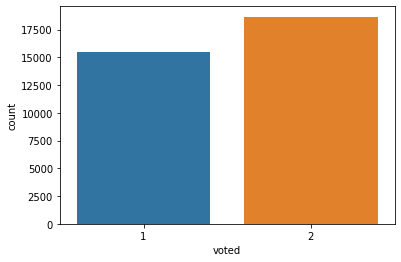

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [ ]:
major = y_train.mode()[0]

In [ ]:
y_pred = [major] * len(y_train)

In [ ]:
#기준모델 정확도 예측 
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.5464581686140151


다중선형회귀

타겟인코딩/다중선형회귀사용


In [ ]:
#문자형 특성을 사용하기 위한 라벨인코딩 진행 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train_l= X_train.copy()
X_test_l = X_test.copy()

In [ ]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    LinearRegression(n_jobs=-1),
)
pipe.fit(X_train_l, y_train)

print('검증세트 정확도', pipe.score(X_test_l, y_test))

y_pred = pipe.predict(X_test_l)

검증세트 정확도 0.16211248983692295


In [ ]:
model_lr = pipe.named_steps['linearregression']

In [ ]:
pd.Series(model_lr.coef_, features)

age_group    -0.081852
education    -0.126909
engnat       -0.001154
familysize    0.002042
gender       -0.006373
married       0.001373
race         -0.027253
religion      0.003490
urban         0.021470
dtype: float64

In [ ]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [ ]:
display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,0.207548
1,MAE,0.413869
2,RMSE,0.455574
3,R2,0.162112


In [ ]:
test_data = [[1,1,1,10,1,1,1,1,1]]
model_lr.predict(test_data)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.95115082])

In [ ]:
#평가지표가 매우 낮게 나타나는 것을 확인함
#그러나, 테스트데이터를 넣었을 때, 투표여부가 명확하게 나타나지 않음 
#다중선형회귀는 사용하지 않는 것으로 결론

로지스틱회귀

In [ ]:
X_train_lr= X_train.copy()
X_test_lr=X_test.copy()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe_lr = make_pipeline(
    StandardScaler(), 
    LogisticRegression(random_state=1)
)
pipe_lr.fit(X_train_lr, y_train)

y_pred = pipe_lr.predict(X_test_lr)
print('검증 정확도: ', accuracy_score(y_test, y_pred))

검증 정확도:  0.6679258543441975


In [ ]:
#로지스틱 회귀 결과 정확도가 기준모델보다 높게 나타남

랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train_rf= X_train.copy()
X_test_rf=X_test.copy()

In [ ]:
from sklearn.metrics import accuracy_score

pipe_r = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=10,  n_jobs=-1, )
)
pipe_r.fit(X_train_rf, y_train)


y_pred = pipe_r.predict(X_test_rf)

print('검증 정확도: ', accuracy_score(y_test, y_pred))


검증 정확도:  0.6536941052446631


XGBOOST

In [ ]:
X_train_x= X_train.copy()
X_test_x=X_test.copy()

In [ ]:
from xgboost import XGBClassifier

pipe_x = make_pipeline(
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe_x.fit(X_train_x, y_train)

y_pred = pipe_x.predict(X_test_x)

print('검증 정확도: ', accuracy_score(y_test, y_pred))

검증 정확도:  0.6836510585961522


In [ ]:
#xgboost모델이 가장 정확도가 높게 나와 xgboost모델을 기준으로 이후 작업 진행 

In [ ]:
#교차검증수행 


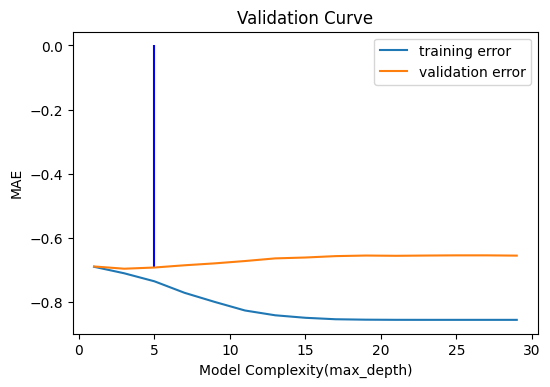

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

pipe_x = make_pipeline(
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)


depth = range(1, 30, 2)
ts, vs = validation_curve(
    pipe_x, X_train_x, y_train
    , param_name='xgbclassifier__max_depth'
    , param_range=depth, scoring='accuracy'
    , cv=3
    , n_jobs=-1
)

train_scores_mean = np.mean(-ts, axis=1)
validation_scores_mean = np.mean(-vs, axis=1)

fig, ax = plt.subplots()

# 훈련세트 검증곡선
ax.plot(depth, train_scores_mean, label='training error')

# 검증세트 검증곡선
ax.plot(depth, validation_scores_mean, label='validation error')

# 이상적인 max_depth
ax.vlines(5,0, train_scores_mean.max(), color='blue')

# 그래프 셋팅
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='MAE')
ax.legend()
fig.dpi = 100

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe_x = make_pipeline(
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=5
                  , learning_rate=0.2
                 )
)

dists = {
    'xgbclassifier__n_estimators': randint(50, 500), 
    'xgbclassifier__max_depth': [5, 10, 15, 20, None], 
    'xgbclassifier__max_features': uniform(0, 1), # max_features
    'xgbclassifier__learning_rate': np.arange(0.01, 1, 0.05)
}

clf = RandomizedSearchCV(
    pipe_x, 
    random_state=2, 
    param_distributions=dists, 
    n_iter=10, 
    cv=3, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training

In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__learning_rate': 0.41000000000000003, 'xgbclassifier__max_depth': 5, 'xgbclassifier__max_features': 0.5496624778787091, 'xgbclassifier__n_estimators': 125}
MAE:  -0.6899177135494451


In [ ]:
best = clf.best_estimator_

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = best.predict(X_test)
print('검증 정확도: ', accuracy_score(y_test, y_pred))

검증 정확도:  0.6830361064745674


In [ ]:
!pip install eli5

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    best.named_steps['xgbclassifier'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_test, y_test);

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 46.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=9254b13a0e05a7f91675e599976eebbf532f8baf8ae9e2864a72f73cc0d16087
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
feature_names = X_test.columns.tolist()

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0726 ± 0.0029,education
0.0604 ± 0.0029,age_group
0.0255 ± 0.0050,race
0.0145 ± 0.0033,married
0.0097 ± 0.0044,engnat
0.0034 ± 0.0023,religion
0.0008 ± 0.0030,urban
0.0003 ± 0.0031,familysize
-0.0028 ± 0.0022,gender


In [ ]:
print('특성 삭제 전:', X_train.shape, X_test.shape)

특성 삭제 전: (34149, 9) (11383, 9)


In [ ]:
minimum_importance = 0.005
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_test_selected = X_test[features]

In [ ]:
print('특성 삭제 후:', X_train_selected.shape, X_test_selected.shape)

특성 삭제 후: (34149, 5) (11383, 5)


In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe_se = XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=5
                  , learning_rate=0.2
                 )

dists = {
    'xgbclassifier__n_estimators': randint(50, 500), 
    'xgbclassifier__max_depth': [5, 10, 15, 20, None], 
    'xgbclassifier__max_features': uniform(0, 1), # max_features
    'xgbclassifier__learning_rate': np.arange(0.01, 1, 0.05)
}

clf = RandomizedSearchCV(
    pipe_se,
    random_state=2, 
    param_distributions=dists, 
    n_iter=10, 
    cv=3, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train_selected, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [88]:
best = clf.best_estimator_

In [89]:
from sklearn.metrics import mean_absolute_error

y_pred = best.predict(X_test_selected)
print('검증 정확도: ', accuracy_score(y_test, y_pred))

검증 정확도:  0.685232364051656


분류모델의 성능 평가

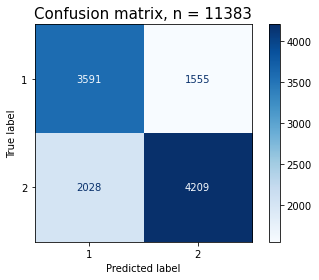

In [90]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(best, X_test_selected, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [91]:
cm = pcm.confusion_matrix
cm

array([[3591, 1555],
       [2028, 4209]])

In [92]:
import numpy as np

correct_predictions = np.diag(cm).sum()
correct_predictions

7800

In [93]:
total_predictions = cm.sum()
total_predictions

11383

In [94]:
correct_predictions/total_predictions

0.685232364051656

In [95]:
print('검증 정확도: ', accuracy_score(y_test, y_pred))

검증 정확도:  0.685232364051656


In [96]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.6863336135586426

In [97]:
!pip install pdpbox
from pdpbox.pdp import pdp_isolate, pdp_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
feature='age_group'

isolated = pdp_isolate(
    model=best, 
    dataset=X_test_selected, 
    model_features=X_test_selected.columns, 
    feature='age_group'
)

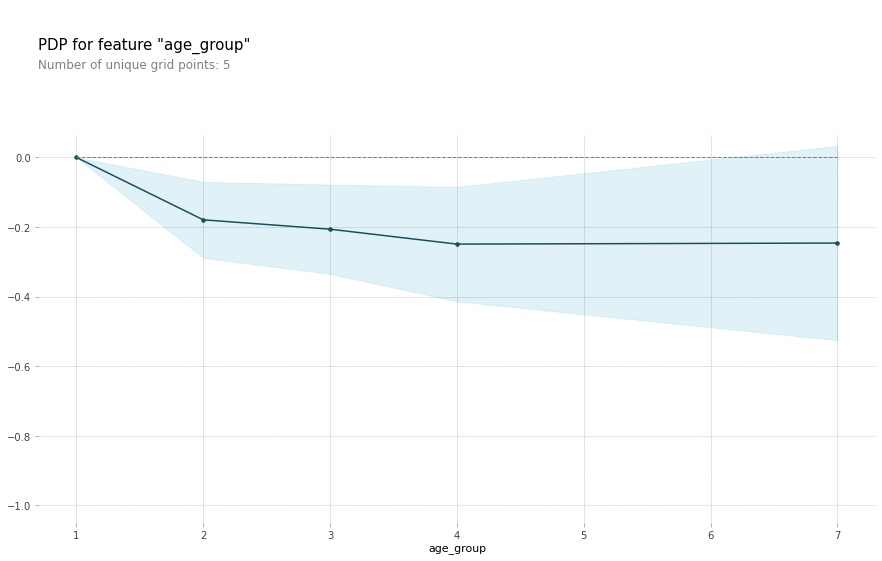

In [99]:
pdp_plot(isolated, feature_name=feature);

In [100]:
feature='education'

isolated = pdp_isolate(
    model=best, 
    dataset=X_test_selected, 
    model_features=X_test_selected.columns, 
    feature='education'
)

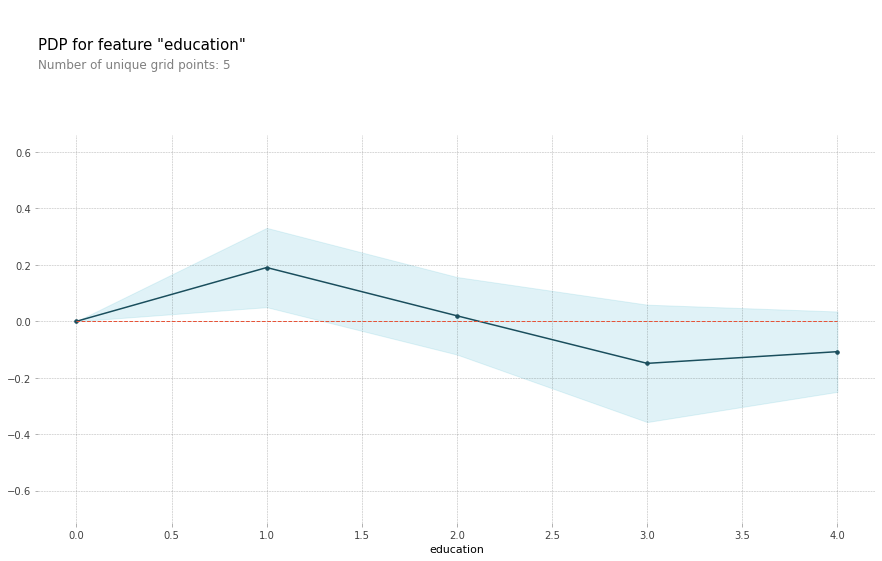

In [101]:
pdp_plot(isolated, feature_name=feature);

In [102]:
feature='race'

isolated = pdp_isolate(
    model=best, 
    dataset=X_test_selected, 
    model_features=X_test_selected.columns, 
    feature= feature
)

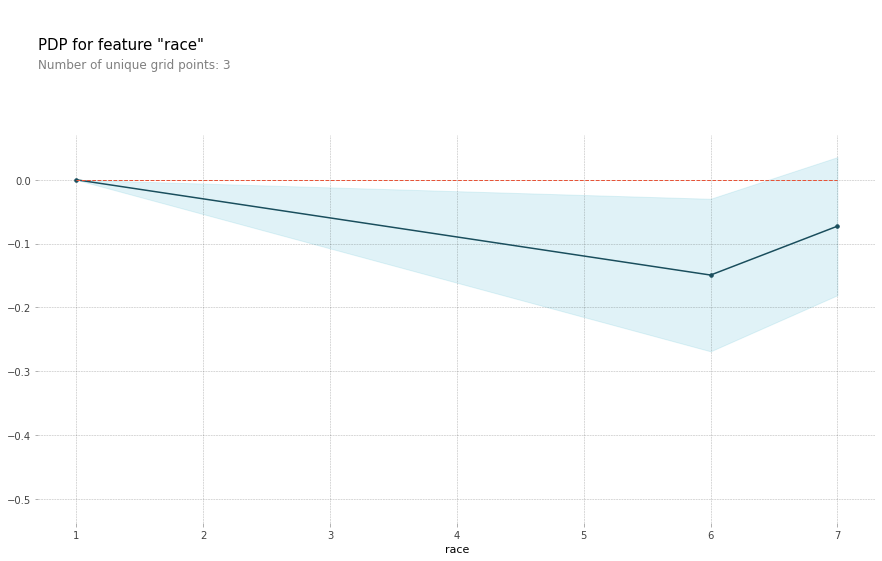

In [103]:
pdp_plot(isolated, feature_name=feature);

In [104]:
feature='married'

isolated = pdp_isolate(
    model=best, 
    dataset=X_test_selected, 
    model_features=X_test_selected.columns, 
    feature= feature
)

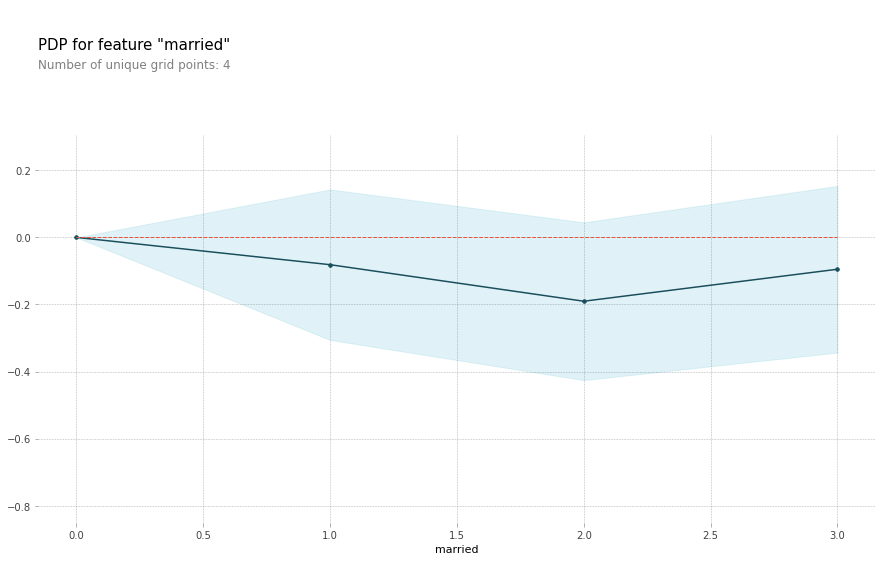

In [105]:
pdp_plot(isolated, feature_name=feature);

In [106]:
feature='engnat'

isolated = pdp_isolate(
    model=best, 
    dataset=X_test_selected, 
    model_features=X_test_selected.columns, 
    feature= feature
)

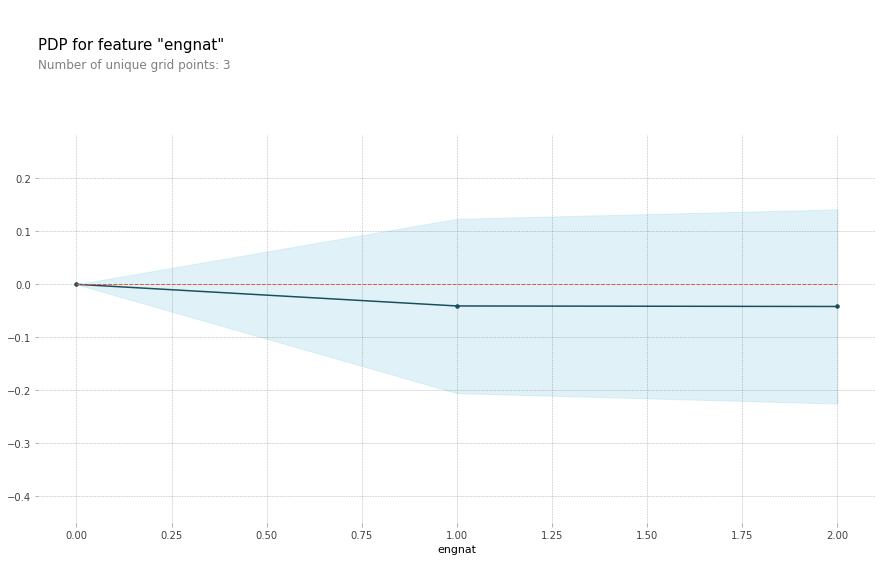

In [107]:
pdp_plot(isolated, feature_name=feature);

In [108]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['education', 'age_group']

interaction = pdp_interact(
    model=best, 
    dataset=X_test_selected,
    model_features=X_test_selected.columns, 
    features=features
)

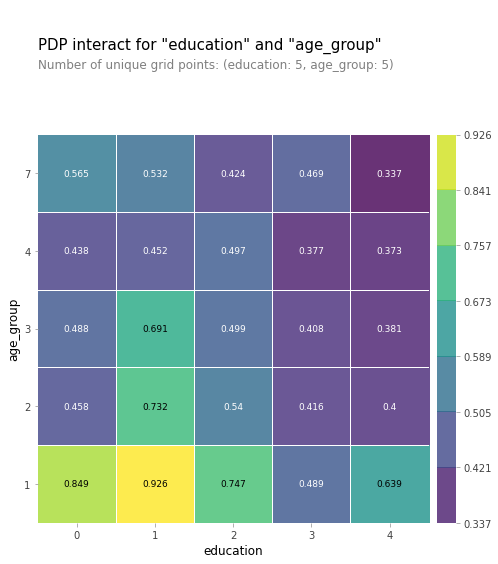

In [109]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [110]:
row = X_test_selected.iloc[[300]]  #301번째 데이터 
row

,age_group,education,engnat,married,race
21060,2,3,2,1,1


In [111]:
# 실제 집값
y_test.iloc[[300]]

21060    2
Name: voted, dtype: int64

In [112]:
best.predict(row) #실제값과 예측값이 같게 출력됨 

array([2])

In [113]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
explainer = shap.TreeExplainer(best)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)